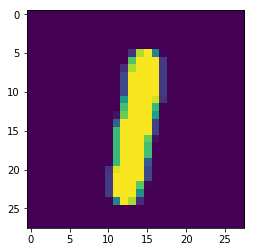

1.0
Classification report for classifier GaussianNB(priors=None):
             precision    recall  f1-score   support

        0.0       0.79      0.89      0.84       980
        1.0       0.85      0.95      0.90      1135
        2.0       0.90      0.26      0.40      1032
        3.0       0.71      0.35      0.47      1010
        4.0       0.88      0.17      0.29       982
        5.0       0.55      0.05      0.09       892
        6.0       0.65      0.93      0.77       958
        7.0       0.88      0.27      0.42      1028
        8.0       0.28      0.67      0.40       974
        9.0       0.37      0.95      0.53      1009

avg / total       0.69      0.56      0.52     10000


Confusion matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.mldata import fetch_mldata
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm, metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

dataset = fetch_mldata('MNIST original')

#Importing the Data from the dataset 
X = dataset["data"];
y = dataset["target"]; 

#Printing random image at 10062 position to verify the data fetch was successful or not 
element_num  = 10062
temp = X[element_num].reshape(28,28)
plt.imshow(temp)
plt.show()
print(y[element_num])              #Printing the label associated with the prinnted image 

#Separating the trainig and test data
Train_X = X[:60000]; 
Train_y = y[:60000];
Test_X  = X[60000:]; 
Test_y  = expected = y[60000:]; 

#Training data and the test data are separetd properly, 
#We dont need to worry about them. But as we are going to perform a cross-validation on the tranning set 
#lets make shufful it so that the data gets equally distributed and none of the data digits escape any of the 
#validation set or the traning set, as some algorithm only performs well on the equally distributed data. 
reviced_index = np.random.permutation(Train_X.shape[0])
Train_X, Train_y = Train_X[reviced_index], Train_y[reviced_index]

#Training the Model with the MLP Classifier with one hidden layer fully connected 
ML_model = GaussianNB()

ML_model.fit(Train_X, Train_y); 
predicted=ML_model.predict(Test_X)

print("Classification report for classifier %s:\n%s\n"
      % (ML_model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


# Cross Validation for predicting training error
#No of K = 10; 
score = cross_val_score(ML_model, Train_X, Train_y, cv= 3)
print('Traning Accuracy is = ' + str(score.mean() * 100) + '%')

# Test Error calculation 
Test_pred_y = ML_model.predict(Test_X);
test_accuracy = sum(Test_pred_y == Test_y); 
print('Generalization Accuracy = ' + str(test_accuracy/len(Test_pred_y) * 100)+ '%');